<a href="https://colab.research.google.com/github/leonatopl/dataxgurupl/blob/master/Forecast_vacc_12monthslag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <font color='blue'> Group 2 - Final Project - November 26th, 2022 </center> </font>

# <center><font color=green>Time Series - Linear Regression</font> </center>

##  Approach: Machine Learning Supervised Linear Regression

## STEP 1: Import Libraries

In [ ]:
#Importing nececcary libraries
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


import seaborn as sns
sns.set(color_codes=True)

# filter warnings
import warnings
warnings.filterwarnings('ignore')



## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Data description and Load the Data

Dataset was retrieved from https://data.chhs.ca.gov/dataset/vaccine-progress-dashboard

In [ ]:
#Dataset location
covid_vaccines = 'covid19vaccineCleaned.csv'

In [ ]:
#Using Pandas DataFrame to load the data

df = pd.read_csv(covid_vaccines)

In [ ]:
#Display the first five rows in the dataset
df.head()

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,...,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,bivalent_booster_recip_count,cumulative_booster_recip_count,cumulative_bivalent_booster_recip_count,booster_eligible_population,bivalent_booster_eligible_population
0,Alameda,1/5/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1396064,1396064
1,Alameda,7/27/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1396064,1396064
2,Alameda,7/30/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064
3,Alameda,7/31/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064
4,Alameda,8/1/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064


## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 3: Clean the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   county                                   49737 non-null  object
 1   administered_date                        49737 non-null  object
 2   total_doses                              49737 non-null  int64 
 3   cumulative_total_doses                   49737 non-null  int64 
 4   pfizer_doses                             49737 non-null  int64 
 5   cumulative_pfizer_doses                  49737 non-null  int64 
 6   moderna_doses                            49737 non-null  int64 
 7   cumulative_moderna_doses                 49737 non-null  int64 
 8   jj_doses                                 49737 non-null  int64 
 9   cumulative_jj_doses                      49737 non-null  int64 
 10  partially_vaccinated                     49737 non-null  i

In [ ]:
#Checking for missing values

df.isnull().sum()

county                                     0
administered_date                          0
total_doses                                0
cumulative_total_doses                     0
pfizer_doses                               0
cumulative_pfizer_doses                    0
moderna_doses                              0
cumulative_moderna_doses                   0
jj_doses                                   0
cumulative_jj_doses                        0
partially_vaccinated                       0
total_partially_vaccinated                 0
fully_vaccinated                           0
cumulative_fully_vaccinated                0
at_least_one_dose                          0
cumulative_at_least_one_dose               0
booster_recip_count                        0
bivalent_booster_recip_count               0
cumulative_booster_recip_count             0
cumulative_bivalent_booster_recip_count    0
booster_eligible_population                0
bivalent_booster_eligible_population       0
dtype: int

## STEP 4: Data Preparation and Visualization


In [ ]:
df1=df[['administered_date','total_doses']]
df1.head()

,administered_date,total_doses
0,1/5/20,0
1,7/27/20,0
2,7/30/20,0
3,7/31/20,0
4,8/1/20,0


In [ ]:
# converting date from datatype to datatime datatype
df1['administered_date'] = pd.to_datetime(df1['administered_date'])
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   administered_date  49737 non-null  datetime64[ns]
 1   total_doses        49737 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 777.3 KB
None


,administered_date,total_doses
0,2020-01-05,0
1,2020-07-27,0
2,2020-07-30,0
3,2020-07-31,0
4,2020-08-01,0


In [ ]:
df1.describe()

,total_doses
count,49737.000000
mean,1705.813961
std,5877.405980
min,0.000000
25%,9.000000
50%,156.000000
75%,1047.000000
max,140186.000000


In [ ]:
#convert to the monthly period and then sum the numbers in the period
df1['administered_date'] = df1['administered_date'].dt.to_period("M")
monthly_vac = df1.groupby('administered_date').sum().reset_index()
print(monthly_vac)

   administered_date  total_doses
0            2020-01            1
1            2020-07           40
2            2020-08          959
3            2020-09         1882
4            2020-10          845
5            2020-11          892
6            2020-12       562577
7            2021-01      3383990
8            2021-02      6237303
9            2021-03     10348677
10           2021-04     11751587
11           2021-05      7174430
12           2021-06      3503310
13           2021-07      2112490
14           2021-08      2711819
15           2021-09      2493298
16           2021-10      3402441
17           2021-11      5530503
18           2021-12      6300675
19           2022-01      4591432
20           2022-02      1837788
21           2022-03      1059795
22           2022-04      1931623
23           2022-05      1538555
24           2022-06      1197803
25           2022-07      1141857
26           2022-08       732091
27           2022-09      1804981
28           2

In [ ]:
monthly_vac['administered_date'] = monthly_vac['administered_date'].dt.to_timestamp()


### Step 4.1 Visualize actual doses administered vs periods of elevated cases and deaths

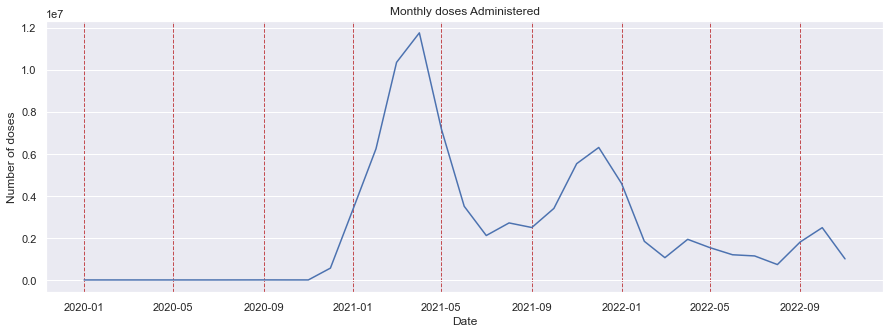

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(monthly_vac['administered_date'],monthly_vac['total_doses'])
plt.xlabel('Date')
plt.ylabel('Number of doses')
plt.title('Monthly doses Administered')
plt.grid(color='r', axis = 'x', linestyle='--', linewidth=1)
plt.show()



In [ ]:
# create a clolumn with the differences on the monthly vaccines
# to make this data stationary, increase or decrease in doses
monthly_vac['doses_diff'] = monthly_vac['total_doses'].diff()
# drop the months where data is not available
monthly_vac = monthly_vac.dropna()
print(monthly_vac)

   administered_date  total_doses  doses_diff
1         2020-07-01           40        39.0
2         2020-08-01          959       919.0
3         2020-09-01         1882       923.0
4         2020-10-01          845     -1037.0
5         2020-11-01          892        47.0
6         2020-12-01       562577    561685.0
7         2021-01-01      3383990   2821413.0
8         2021-02-01      6237303   2853313.0
9         2021-03-01     10348677   4111374.0
10        2021-04-01     11751587   1402910.0
11        2021-05-01      7174430  -4577157.0
12        2021-06-01      3503310  -3671120.0
13        2021-07-01      2112490  -1390820.0
14        2021-08-01      2711819    599329.0
15        2021-09-01      2493298   -218521.0
16        2021-10-01      3402441    909143.0
17        2021-11-01      5530503   2128062.0
18        2021-12-01      6300675    770172.0
19        2022-01-01      4591432  -1709243.0
20        2022-02-01      1837788  -2753644.0
21        2022-03-01      1059795 

### STEP 4.2 Calulate the sales difference (stationarize time series)

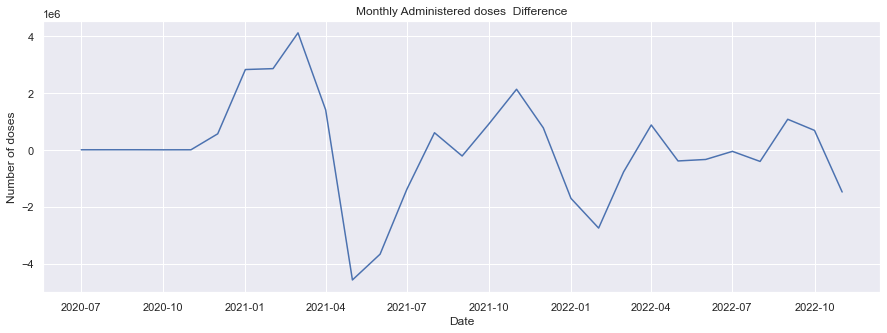

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_vac['administered_date'],monthly_vac['doses_diff'])
plt.xlabel('Date')
plt.ylabel('Number of doses')
plt.title('Monthly Administered doses  Difference')
plt.show()

In [ ]:
# dropping off sales and date to deal just with stacionary data
df2 = monthly_vac.drop(['administered_date','total_doses'],axis=1)
print(df2.head())
print(df2.shape)

   doses_diff
1        39.0
2       919.0
3       923.0
4     -1037.0
5        47.0
(29, 1)


### STEP 4.3 create the variables for month lag from 1 to 12

In [ ]:
# Preparing the supervised data
for i in range(1,13):
    col_name = 'week_' + str(i)
    df2[col_name] = df2['doses_diff'].shift(i)
print(df2.head())
df2 = df2.dropna().reset_index(drop=True)
df2.head(29)

   doses_diff  week_1  week_2  week_3  week_4  week_5  week_6  week_7  week_8  \
1        39.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2       919.0    39.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3       923.0   919.0    39.0     NaN     NaN     NaN     NaN     NaN     NaN   
4     -1037.0   923.0   919.0    39.0     NaN     NaN     NaN     NaN     NaN   
5        47.0 -1037.0   923.0   919.0    39.0     NaN     NaN     NaN     NaN   

   week_9  week_10  week_11  week_12  
1     NaN      NaN      NaN      NaN  
2     NaN      NaN      NaN      NaN  
3     NaN      NaN      NaN      NaN  
4     NaN      NaN      NaN      NaN  
5     NaN      NaN      NaN      NaN  


,doses_diff,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12
0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0,47.0,-1037.0,923.0,919.0,39.0
1,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0,47.0,-1037.0,923.0,919.0
2,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0,47.0,-1037.0,923.0
3,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0,47.0,-1037.0
4,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0,47.0
5,770172.0,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0,561685.0
6,-1709243.0,770172.0,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0,2821413.0
7,-2753644.0,-1709243.0,770172.0,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0,2853313.0
8,-777993.0,-2753644.0,-1709243.0,770172.0,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0,4111374.0
9,871828.0,-777993.0,-2753644.0,-1709243.0,770172.0,2128062.0,909143.0,-218521.0,599329.0,-1390820.0,-3671120.0,-4577157.0,1402910.0


In [ ]:
df2.shape

(17, 13)

## STEP 5: Split the data in training and test

In [ ]:
# split the data between train and test data
df2_train = df2.iloc[:-6]
#print(df2_train.head())
df2_test = df2.iloc[-6:]
#print(df2_test.head())
print("Train data Shape", df2_train.shape)
print("Test data Shape", df2_test.shape)

Train data Shape (11, 13)
Test data Shape (6, 13)


### STEP 5.1 Transform the data in smaller scale

In [ ]:
#scale the values between -1 and 1
scaler =MinMaxScaler(feature_range=(-1,1))
scaler.fit(df2_train)
df2_train = scaler.transform(df2_train)
df2_test = scaler.transform(df2_test)

### STEP 5.2 Get the X and Y variables fot training and test data

In [ ]:
X_train, Y_train = df2_train[:,1:], df2_train[:,0:1]
X_test, Y_test = df2_test[:,1:], df2_test[:,0:1]
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
print('X_train Shape', X_train.shape)
print('Y_train Shape', Y_train.shape)
print('X_test Shape', X_test.shape)
print('Y_test Shape', Y_test.shape)


X_train Shape (11, 12)
Y_train Shape (11,)
X_test Shape (6, 12)
Y_test Shape (6,)


In [ ]:
# Make a prediction data frame to merge the predicted
doses_dates = monthly_vac['administered_date'][-6:].reset_index(drop=True)

In [ ]:
predict_df = pd.DataFrame(doses_dates)
predict_df.head()

,administered_date
0,2022-06-01
1,2022-07-01
2,2022-08-01
3,2022-09-01
4,2022-10-01


In [ ]:
act_doses = monthly_vac['total_doses'][-7:].to_list()
print(act_doses)

[1538555, 1197803, 1141857, 732091, 1804981, 2486550, 1001875]


## STEP 6: Build and and train the Model

In [ ]:
# Create the linear regression model and predicted output
model = LinearRegression()
model.fit(X_train, Y_train)
lr_pre = model.predict(X_test)

### STEP 6.1 Transform the data back to original scale

In [ ]:
# transform the values back to the original scale
lr_pre = lr_pre.reshape(-1,1)
# Create a matrix with the X test and predicted doses
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)


In [ ]:
result_list = []
for i2 in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[i2][0] + act_doses[i2])
lr_pre_series = pd.Series(result_list, name = 'Linear Prediction')
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True)
print(predict_df.shape)
print(monthly_vac.shape)
predict_df


(6, 2)
(29, 3)


,administered_date,Linear Prediction
0,2022-06-01,9.121751e+05
1,2022-07-01,1.345304e+06
2,2022-08-01,2.185924e+06
3,2022-09-01,-2.875892e+05
4,2022-10-01,2.787490e+05
5,2022-11-01,2.186271e+06


## STEP 7: Model Evaluation

In [ ]:
# Evaluation of the model : Calculate the the meanSquared error, MAE and R2
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_vac['total_doses'][-6:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'],monthly_vac['total_doses'][-6:])
lr_r2 = r2_score(predict_df['Linear Prediction'],monthly_vac['total_doses'][-6:])
print('Linear regression MSE', lr_mse )
print('Linear regression MAE', lr_mae )
print('Linear regression R2', lr_r2 )

Linear regression MSE 1465869.1299511846
Linear regression MAE 1237945.9093991949
Linear regression R2 -1.55074773726906


## STEP 8: Visualization of predictions

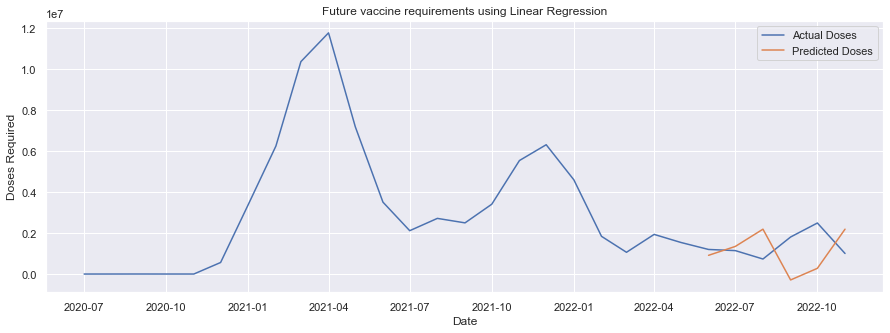

In [ ]:
#Visualize the prediction
plt.figure(figsize=(15,5))
# actual sales
plt.plot(monthly_vac['administered_date'], monthly_vac['total_doses'])
# predicted sales
plt.plot(predict_df['administered_date'],predict_df['Linear Prediction'])
plt.title("Future vaccine requirements using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Doses Required")
plt.legend(['Actual Doses', 'Predicted Doses'])
plt.show()